# Mental Health On a Map

This notebook seeks to explore relationships and patterns of the attributes of the business listings for mental health services in the Inland Empire. 

## Introduction



The state of good mental health in America is in steady decline. More and more Americans are getting depressed and / or suffer from various mental health disorders such as addiction, social anxiety disorder (SAD), and obsessive compulsive disorder (OCD). Poor mental health not only affects the lives of the patients, but also the patients' families and loved ones which spirals into a domino effect that causes the emergence of a mentally moribund society. One of the most dangerous effects of poor mental health is the attempt to commit suicide. I believe that it's time to not depend solely on appointments at insured hospitals for mental health consultations, but to actually increase the possible mental health support through a personalized network. In this project, I use a geospatial information systems (GIS) and a cognitive intelligence solution to help patients navigate their mental health by doing nothing more than just simply going about their lives and let the heavy lifting be done by advances in technology. I was inspired to do this project after hearing that a Harvey Mudd student committed suicide in the late summer of this year, 2018.

## Data Analysis

This part of the project is about completing 3 objectives through an initial exploration of the data conducted in Python data science stack: 

1. To build an efficient search strategy to find as many mental health services in the Inland Empire as possible.

2. To understand the scope of mental health services in the Inland Empire. 

3. If possible, seeing the relationship of number of suicides in Inland Empire to its clusters of mental health services. 







### Objective 1: An Efficient Search Strategy

At first I had to think about what kind of mental health support services are out there. Clearly, hospitals with psychotherapy services cannot be the only kinds of mental health support since many hospitals also have an outpatient network to deal with increasing demand, but are not always disclosed to the patient. Finding the mental health support structures that are available to the public required the use of the North American Industry Classification System which has codes for several categories of businesses throughout the United States. I used the following codes for my search: 

* 621330: Social workers' mental health offices (centers and clinics)
* 621140: Mental health centers and clinics (except hospitals), outpatient
* 622210: Mental health hospitals 


After finding these NAICS codes, I used referenceusa.com (Thanks to Dr. Brian Hilton) in order to accurately search for all the mental health verifiable licensed business listings based on zip codes and these NAICS codes for the following cities in the Inland Empire:

* Claremont
* Fontana 
* Montclair
* Ontario
* Pomona
* Rancho Cucamonga
* San Bernardino 

I was able to obtain the data in form of the comma separated value files with highly detailed features, including geospatial information that can help put these businesses onto a map in ArcGIS and thus into a shapefile. Now get a better understanding of the data will be obtained below using the pandas package.


In [73]:
# Importing Python Data Science Stack

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 

# Generating list of csvs to be read by pandas

inland_empire_csvs = ['claremont_MH.csv', 'fontana_MH.csv', 'montclair_MH.csv', 'ontario_MH.csv', 
                     'pomona_MH.csv', 'rancho_cucamonga_MH.csv', 'san_bernardino_MH.csv'] 
data_src_directory = '../data/inland_empire' 

inland_empire_read_data = [data_src_directory + '/' + i for i in inland_empire_csvs] 
print(inland_empire_read_data) 

# Reading in csv files and assigning data frames for cities in Inland Empire

IE_dataFrames = [pd.read_csv(i) for i in inland_empire_read_data]
print(IE_dataFrames) 
# for i in IE_dataFrames:
#     print(i) 








['../data/inland_empire/claremont_MH.csv', '../data/inland_empire/fontana_MH.csv', '../data/inland_empire/montclair_MH.csv', '../data/inland_empire/ontario_MH.csv', '../data/inland_empire/pomona_MH.csv', '../data/inland_empire/rancho_cucamonga_MH.csv', '../data/inland_empire/san_bernardino_MH.csv']
[                       Company Name Executive First Name Executive Last Name  \
0             ABC Madre Nutritional                  NaN                 NaN   
1                      Aguirre, Amy                  Amy             Aguirre   
2                  Aldasoro, Adrian               Adrian            Aldasoro   
3                Arguijo, Abigail P            Abigail P             Arguijo   
4               Barnes, Leahmontain          Leahmontain              Barnes   
5                Barr Jr, Richard A            Richard A             Barr Jr   
6              Beeman's Rx Pharmacy             Robert E              Beeman   
7                  Bown, Marjorie L           Marjorie L   

### Object 2: The Scope of Mental Health Care in the IE 

In order to understand the scope of mental health care in the Inland Empire, I wanted to create a pie chart that shows the number of listings in each city used in the analysis. 



[119, 50, 5, 85, 70, 77, 21]


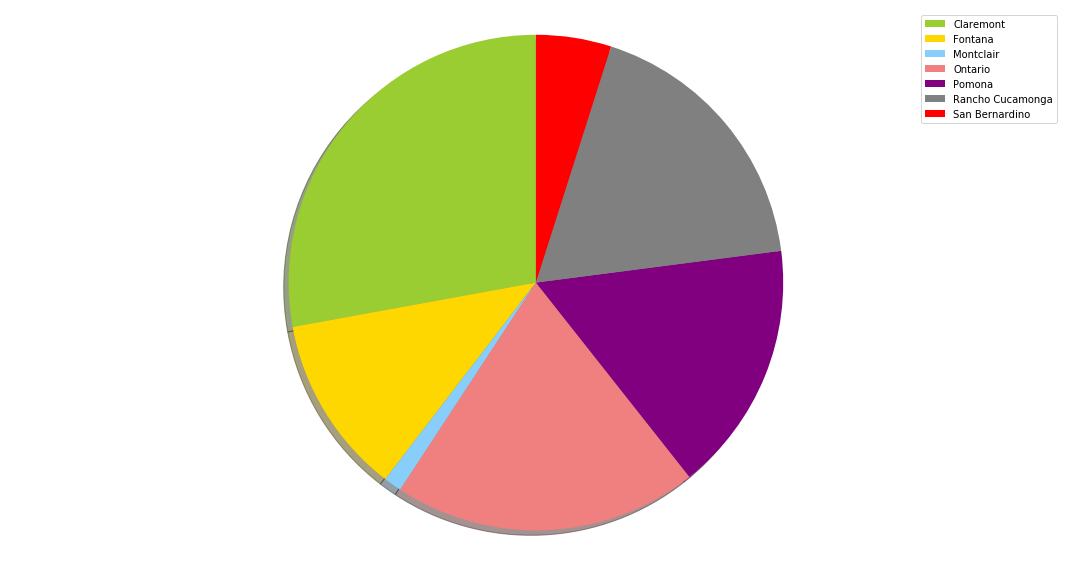

In [15]:
cities = ['Claremont', 'Fontana', 'Montclair', 'Ontario', 'Pomona', 'Rancho Cucamonga', 'San Bernardino']

length_IE_array = [len(i) for i in IE_dataFrames] 
print(length_IE_array) 

# Build Pie Chart 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'purple', 'grey', 'red']
fig, ax = plt.subplots(figsize=(15,8))
patches, texts = plt.pie(length_IE_array, colors=colors, shadow=True, startangle=90) 
plt.legend(patches, cities, loc="best") 
plt.axis('equal')
plt.tight_layout()
plt.show()


## Geospatial Mental Health Business Mapping 

Now that we get an idea of the scope of mental health services available in the Inland Empire, it's time to start building layers of these mental health service listings per city on a map of the Inland Empire. To do this, ArcGIS Online and ArcPy will be used. 

In order to create the layers, I simply imported the comma separated values generated from referenceUSA from the efficient search strategy and data aggregation phase. Two important features in these datasets were the latitude and longitude which were used in the online ArcGIS client to generate geometries of the online shapefile which could be applied as layers for later use. 

The ArcPy API was used to collect the layers from the Esri cloud to be mapped onto a map of the Inland Empire to then be published as a web app. 

### Mental Health Businesses as Layers

In [24]:
from IPython.core.display import display, HTML 
display(HTML('<img src="../images/example_layer.png"/> <img src="../images/layer_list.png"/>')) 



### Working with ArcPy 

In [25]:
# Importing ArcPy API 

from arcgis.gis import * 
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.features import SpatialDataFrame
import getpass 

In [26]:
# Establishing a connection to ArcGIS Online 

gis = GIS(
    "https://www.arcgis.com",
    input("Enter your Esri username: "),
    getpass.getpass("Enter your Esri password: ")
) 

Enter your Esri username: rchatter
Enter your Esri password: ········


### Displaying Maps of the Inland Empire 

In [57]:
# Getting IDs of IE city listing layers on cloud shapefiles from dictionary 

IE_layer_IDs = {
    'Claremont': 'ab7a2e13321b44918ba6cd6ee0647bf9',
    'Fontana': '04db8dd338fd4ce7b3a61bc9e0d89b67',
    'Montclair': 'eddb63e32efe42eeb392ca478d617fb2',
    'Ontario': '716e17a01e6542d8bba042b524a3f04d',
    'Pomona': 'd55ba083c81f4672b8083f8235645dd5',
    'Rancho Cucamonga': 'ab471f8b733e466987b31100c8c408ab',
    'San Bernardino': 'f1916f4daccc4c2eb163be496b149558'
}
print(IE_layer_IDs) 

layer_content = [gis.content.get(i) for i in IE_layer_IDs.values()] 

print(list(IE_layer_IDs.keys()))  

map_locations = [i + ', California' for i in list(IE_layer_IDs.keys())] 
print(map_locations)

# Create a function to map all the locations 

def map_with_layer(ID_item, address):
    loc_map = gis.map(address, 10)
    loc_map.add_layer(ID_item) 
    loc_map
    return loc_map 

# Testing map of Claremont 

claremont_map = map_with_layer(layer_content[0], map_locations[0]) 
fontana_map = map_with_layer(layer_content[1], map_locations[1]) 
montclair_map = map_with_layer(layer_content[2], map_locations[2]) 
ontario_map = map_with_layer(layer_content[3], map_locations[3]) 
pomona_map = map_with_layer(layer_content[4], map_locations[4]) 
rancho_cucamonga_map = map_with_layer(layer_content[5], map_locations[5]) 
san_bernardino_map = map_with_layer(layer_content[6], map_locations[6]) 

display(claremont_map)
display(fontana_map)
display(montclair_map)
display(ontario_map)
display(pomona_map)
display(rancho_cucamonga_map)
display(san_bernardino_map)






{'Claremont': 'ab7a2e13321b44918ba6cd6ee0647bf9', 'Fontana': '04db8dd338fd4ce7b3a61bc9e0d89b67', 'Montclair': 'eddb63e32efe42eeb392ca478d617fb2', 'Ontario': '716e17a01e6542d8bba042b524a3f04d', 'Pomona': 'd55ba083c81f4672b8083f8235645dd5', 'Rancho Cucamonga': 'ab471f8b733e466987b31100c8c408ab', 'San Bernardino': 'f1916f4daccc4c2eb163be496b149558'}
['Claremont', 'Fontana', 'Montclair', 'Ontario', 'Pomona', 'Rancho Cucamonga', 'San Bernardino']
['Claremont, California', 'Fontana, California', 'Montclair, California', 'Ontario, California', 'Pomona, California', 'Rancho Cucamonga, California', 'San Bernardino, California']


MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

### Marking the Claremont Colleges as Geocodes

In [58]:
claremont_addresses = [
    'Claremont Graduate University',
    'Pitzer College',
    'Pomona College',
    'Scripps College',
    'Claremont McKenna College',
    'Harvey Mudd College',
    'Keck Graduate Institute of Applied Life Sciences'
]

mark1 = geocode(address=claremont_addresses[0], as_featureset=True) 
print(len(mark1)) 
mark2 = geocode(address=claremont_addresses[1], as_featureset=True)
print(len(mark2))
mark3 = geocode(address=claremont_addresses[2], as_featureset=True)
print(len(mark3))
mark4 = geocode(address=claremont_addresses[3], as_featureset=True)
print(len(mark4))
mark5 = geocode(address=claremont_addresses[4], as_featureset=True)
print(len(mark5)) 
mark6 = geocode(address=claremont_addresses[5], as_featureset=True)
print(len(mark5))
mark7 = geocode(address=claremont_addresses[6], as_featureset=True)
print(len(mark5)) 

# Draw the feature sets on the map 

claremont_map.draw(mark1)
claremont_map.draw(mark2)
claremont_map.draw(mark3)
claremont_map.draw(mark4)
claremont_map.draw(mark5) 
claremont_map.draw(mark6)
claremont_map.draw(mark7) 



1
1
10
1
1
1
1


### Viewing Claremont Mental Health Services as a Spatial DataFrame

In [72]:
feature_service_search_results = gis.content.search(query='title: "claremont_MH" AND type: "Feature Service" ')
print(feature_service_search_results)
feature_service_item = feature_service_search_results[0]
feature_layer = feature_service_item.layers[0] 

# Building the for Claremont's spatial data frame 

sdf = SpatialDataFrame.from_layer(feature_layer) 
print(sdf)

# Analyzing the shape feature of Claremont mental health service listings

sdf['SHAPE'].head() 

[<Item title:"claremont_MH" type:Feature Layer Collection owner:rchatter>]
    Accounting_Expenses                        Address Advertising__Expenses  \
0        Less than $500            1331 Kendall Dr # 8      Less than $5,000   
1                  None            2130 E Highland Ave                  None   
2                  None            1564 W Base Line St                  None   
3                  None            2130 E Highland Ave                  None   
4                  None          720 Carnegie Dr # 250                  None   
5                  None                    1669 N E St                  None   
6      $1,000 to $2,500              355 E 21st St # A    $10,000 to $20,000   
7                  None    225 W Hospitality Ln # 208a                  None   
8                  None              4041 N Sierra Way                  None   
9        $500 to $1,000      1881 Commercenter E # 232      Less than $5,000   
10                 None          1099 E Hospi

0    {'x': -13059317.933678987, 'y': 4051400.181364...
1    {'x': -13051219.552043267, 'y': 4047116.753952...
2    {'x': -13060059.65544614, 'y': 4045112.1969815...
3    {'x': -13051219.552043267, 'y': 4047116.753952...
4    {'x': -13054373.678495403, 'y': 4038167.968200...
Name: SHAPE, dtype: object

## Mobile Mental Health on a Map

This section takes mental health services on a map to a mobile app. For this part, I decided to use the ArcGIS SDK for the iOS platform. The power of the ArcGIS SDK is that it also enables:
* One's location to be marked on the map
* Esri's APIs to find closest routes from one's location to a nearby mental health service 
* Other peoples' locations to be mapped as support structures for one's mental health




###  Mapping Inland Empire in iOS 

In [68]:
display(HTML('<img src=../images/iOS/claremont_map.png />')) 

# Swift Code shown in Markdown format 

#### Swift Code for Above Map 

```swift
//
//  ViewController.swift
//  DemoViewApp
//
//  Created by Rishov Chatterjee on 12/11/18.
//  Copyright © 2018 Rishov Chatterjee. All rights reserved.
//

import UIKit
import ArcGIS

class ViewController: UIViewController {

    @IBOutlet var mv: AGSMapView!
    
    override func viewDidLoad() {
        super.viewDidLoad()
        setupMap()
    }
    
    private func setupMap() {
        mv.map = AGSMap(basemapType: .lightGrayCanvasVector, latitude: 34.0967, longitude: -117.7198, levelOfDetail: 10)
    }


}

```

### Viewing Mental Health Services Feature Layer in iOS Map

In [69]:
display(HTML('<img src=../images/iOS/feature_layer.png />')) 

```swift
//
//  ViewController.swift
//  DemoViewApp
//
//  Created by Rishov Chatterjee on 12/11/18.
//  Copyright © 2018 Rishov Chatterjee. All rights reserved.
//

import UIKit
import ArcGIS

class ViewController: UIViewController {

    @IBOutlet var mv: AGSMapView!
    private var graphicsOverlay:AGSGraphicsOverlay!
    
    
    override func viewDidLoad() {
        super.viewDidLoad()
        setupMap()
//        createGraphics()
    }
    
    private func setupMap() {
        mv.map = AGSMap(basemapType: .lightGrayCanvasVector, latitude: 34.09668, longitude: -117.71978, levelOfDetail: 10)
        let featureService = URL(string: "https://services.arcgis.com/q3Zg9ERurv23iysr/arcgis/rest/services/claremont_mh/FeatureServer/0")!
        let claremontTable = AGSServiceFeatureTable(url: featureService)
        mv.map!.operationalLayers.add(AGSFeatureLayer(featureTable: claremontTable))
    }
}
```


### Mapping User Location 

In [ ]:
print("Since I used an iOS emulator, the location of the virtual device showed up.") 
display(HTML('<img src=../images/iOS/user_location.png')) 

## Future Steps with IBM Watson Cognitive Computing Services 

I also see natural language processing and machine learning capabilities to automate this process and provide push notifications to the end user solely to give the user the support he or she needs by doing nothing more than going through the day-to-day routine. I outline a design framework for this process in the future steps section. Using IBM Watson, iOS CoreML, and Tensorflow Lite frameworks for a future proof of concept, I plan to do the following:

* Implement a stress score algorithm with user's speech data as input through Watson's speech-to-text and tone analyzer APIs

* Make use of IBM Watson's Rank API to rank stress scores based on various edge cases 

* Use CoreML to detect one's smiles and facial demeanor as a parameter for classifying depression or social anxiety

* Use Tensorflow Lite to build a recommender system for recommending best services to avail within a user's personalized mental health support network. 